# PCA

## TASK 1 EXPLORATORY DATA ANALYSIS

In [67]:
#IMPORTING ALL THE LIBRARIES NEEDED
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA # To Find The Principle Componets
from sklearn.preprocessing import StandardScaler # To Standardize The Data
from sklearn.cluster import KMeans # For Clustering the Data
from sklearn.metrics import silhouette_score, davies_bouldin_score # to identify the cluster strength or performance
import warnings
warnings.filterwarnings("ignore")

In [68]:
wine=pd.read_csv("/content/drive/MyDrive/Assignments/PCA Principle Components Analysis/wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [69]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


The dataset appears to be related to wine characteristics. Here are the attributes present in the dataset:

- Type: The class or type of wine (e.g., different wine cultivars or categories).
- Alcohol: The alcohol content of the wine (%).
- Malic: Malic acid content.
- Ash: Ash content.
- Alcalinity: Alkalinity of ash (measured as the concentration of alkaline substances).
- Magnesium: Magnesium content (mg/L).
- Phenols: Total phenol content.
- Flavanoids: Flavanoid content (a type of phenolic compound).
- Nonflavanoids: Non-flavanoid phenols.
- Proanthocyanins: Proanthocyanin content (a type of phenolic compound).
- Color: Color intensity.
- Hue: Hue (a measure of the color tone).
- Dilution: Dilution ratio (often measured as diluted wine against water).
- Proline: Proline content (an amino acid).

NO NULL VALUES PRESENT IN THE DATASET, IT CAN BE CONCLUDED VISUALLY

In [70]:
# Checking for missing values
print(wine.isnull().sum())

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


In [71]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [72]:
wine.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


### VISUALIZATIONS

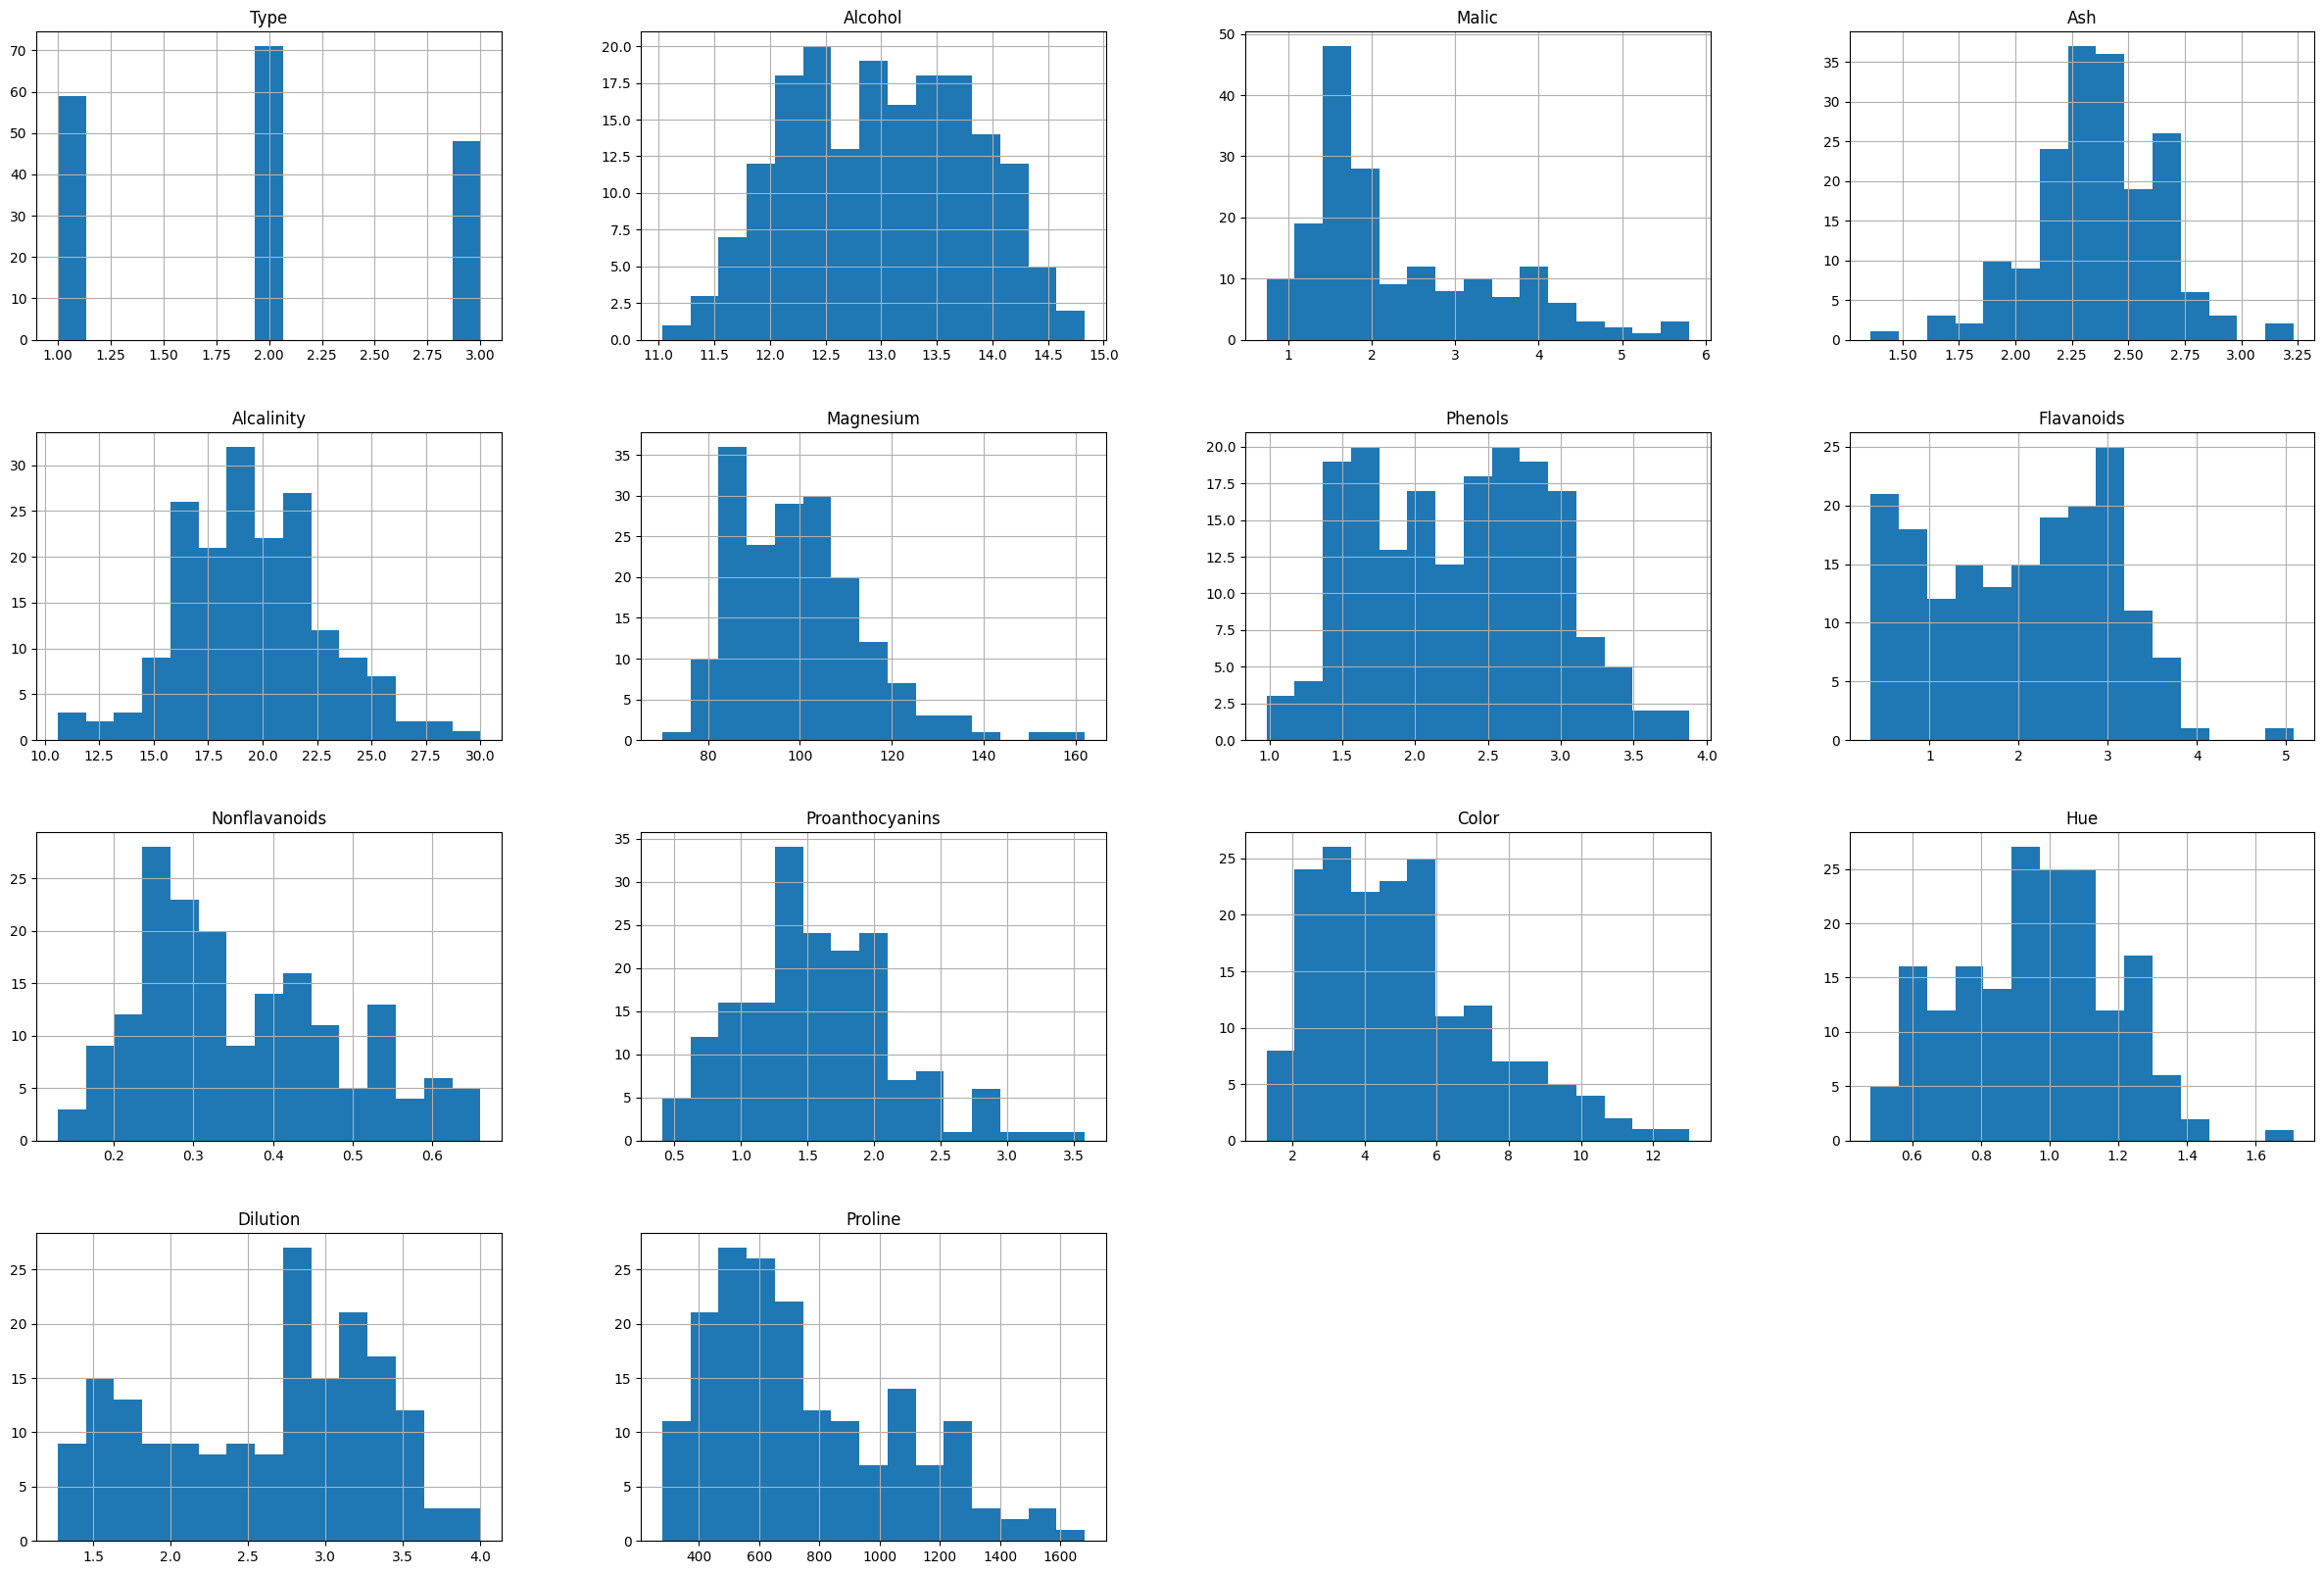

In [73]:
wine.hist(bins=15, figsize=(30, 20))
plt.show()

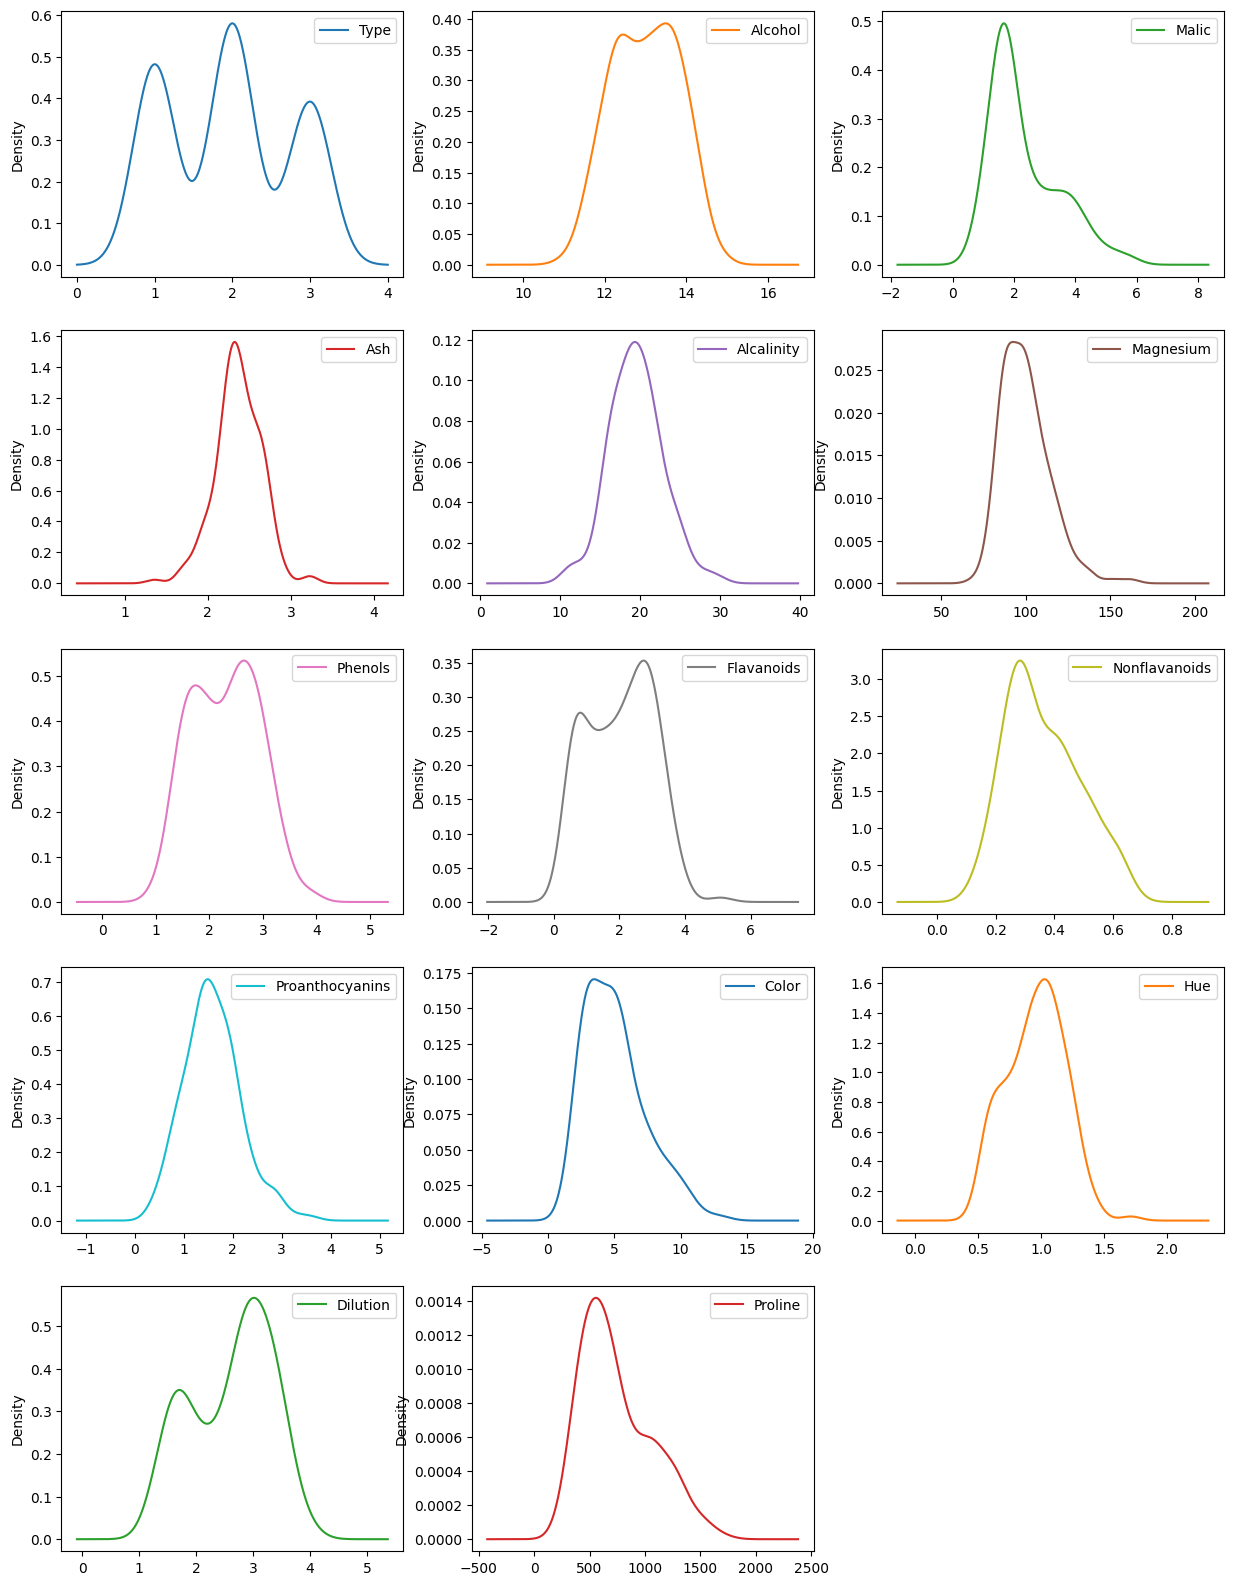

In [74]:
# Density plots for each feature
wine.plot(kind='density', subplots=True, layout=(5, 3), figsize=(15, 20), sharex=False)
plt.show()

In [75]:
wine.skew()

Type               0.107431
Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

- From the above visualizations we can see the amount of skewness does each attribute carry
- attributes such as, Malic, Magnesium, color, Proline have a bit high skewness than all the other attributes in the dataset

<Axes: >

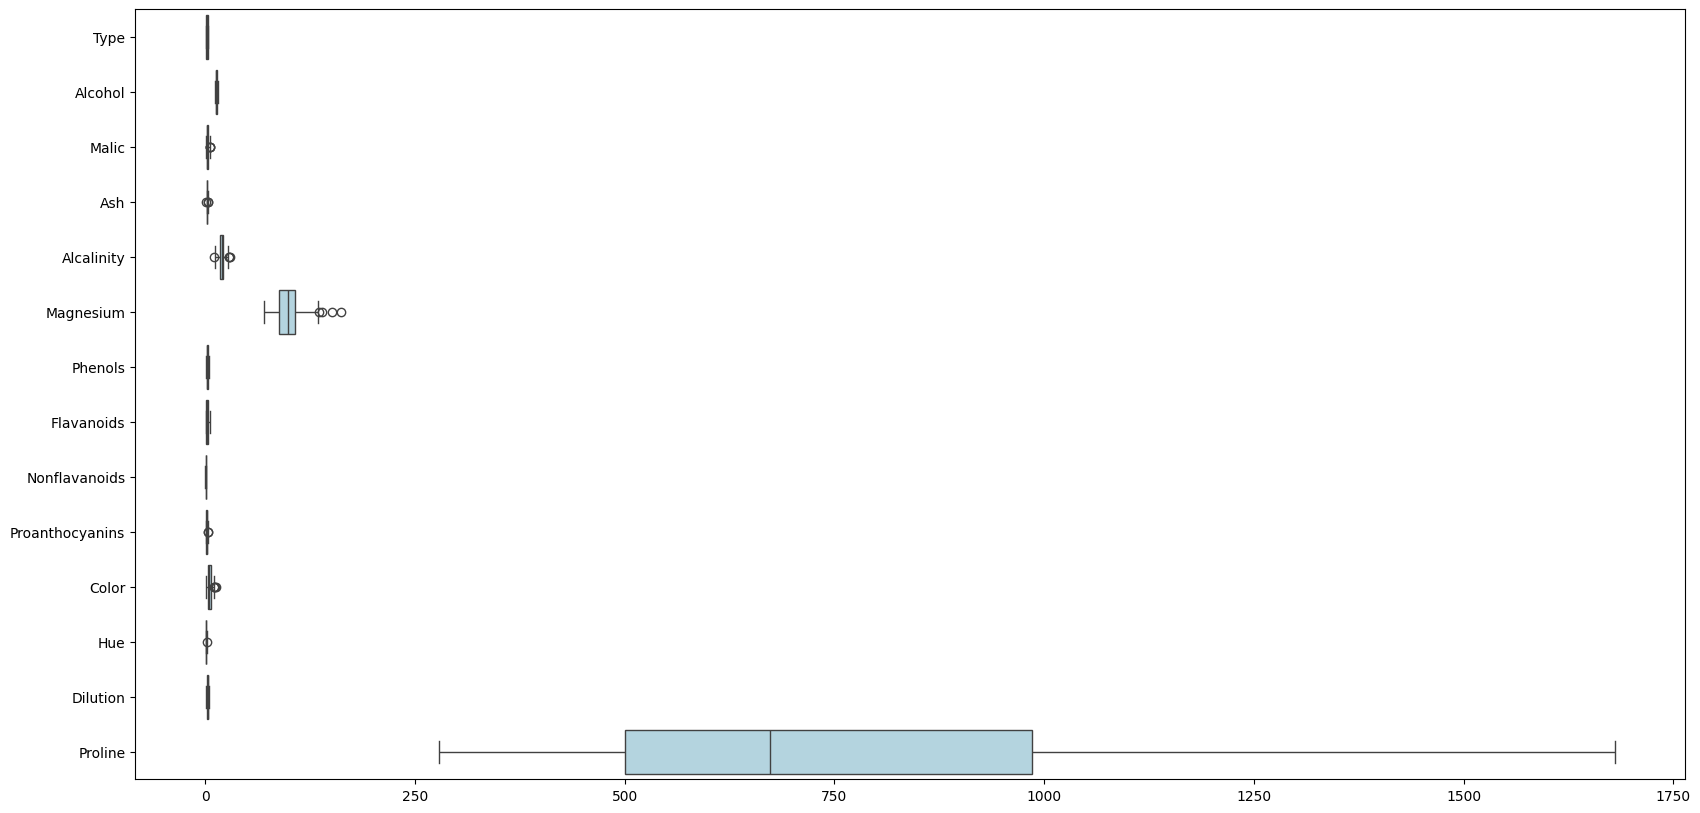

In [76]:
plt.figure(figsize=(20,10))
sns.boxplot(data=wine, orient="h", color="lightblue")

- And as per the BOX-PLOTS there are very less outliers

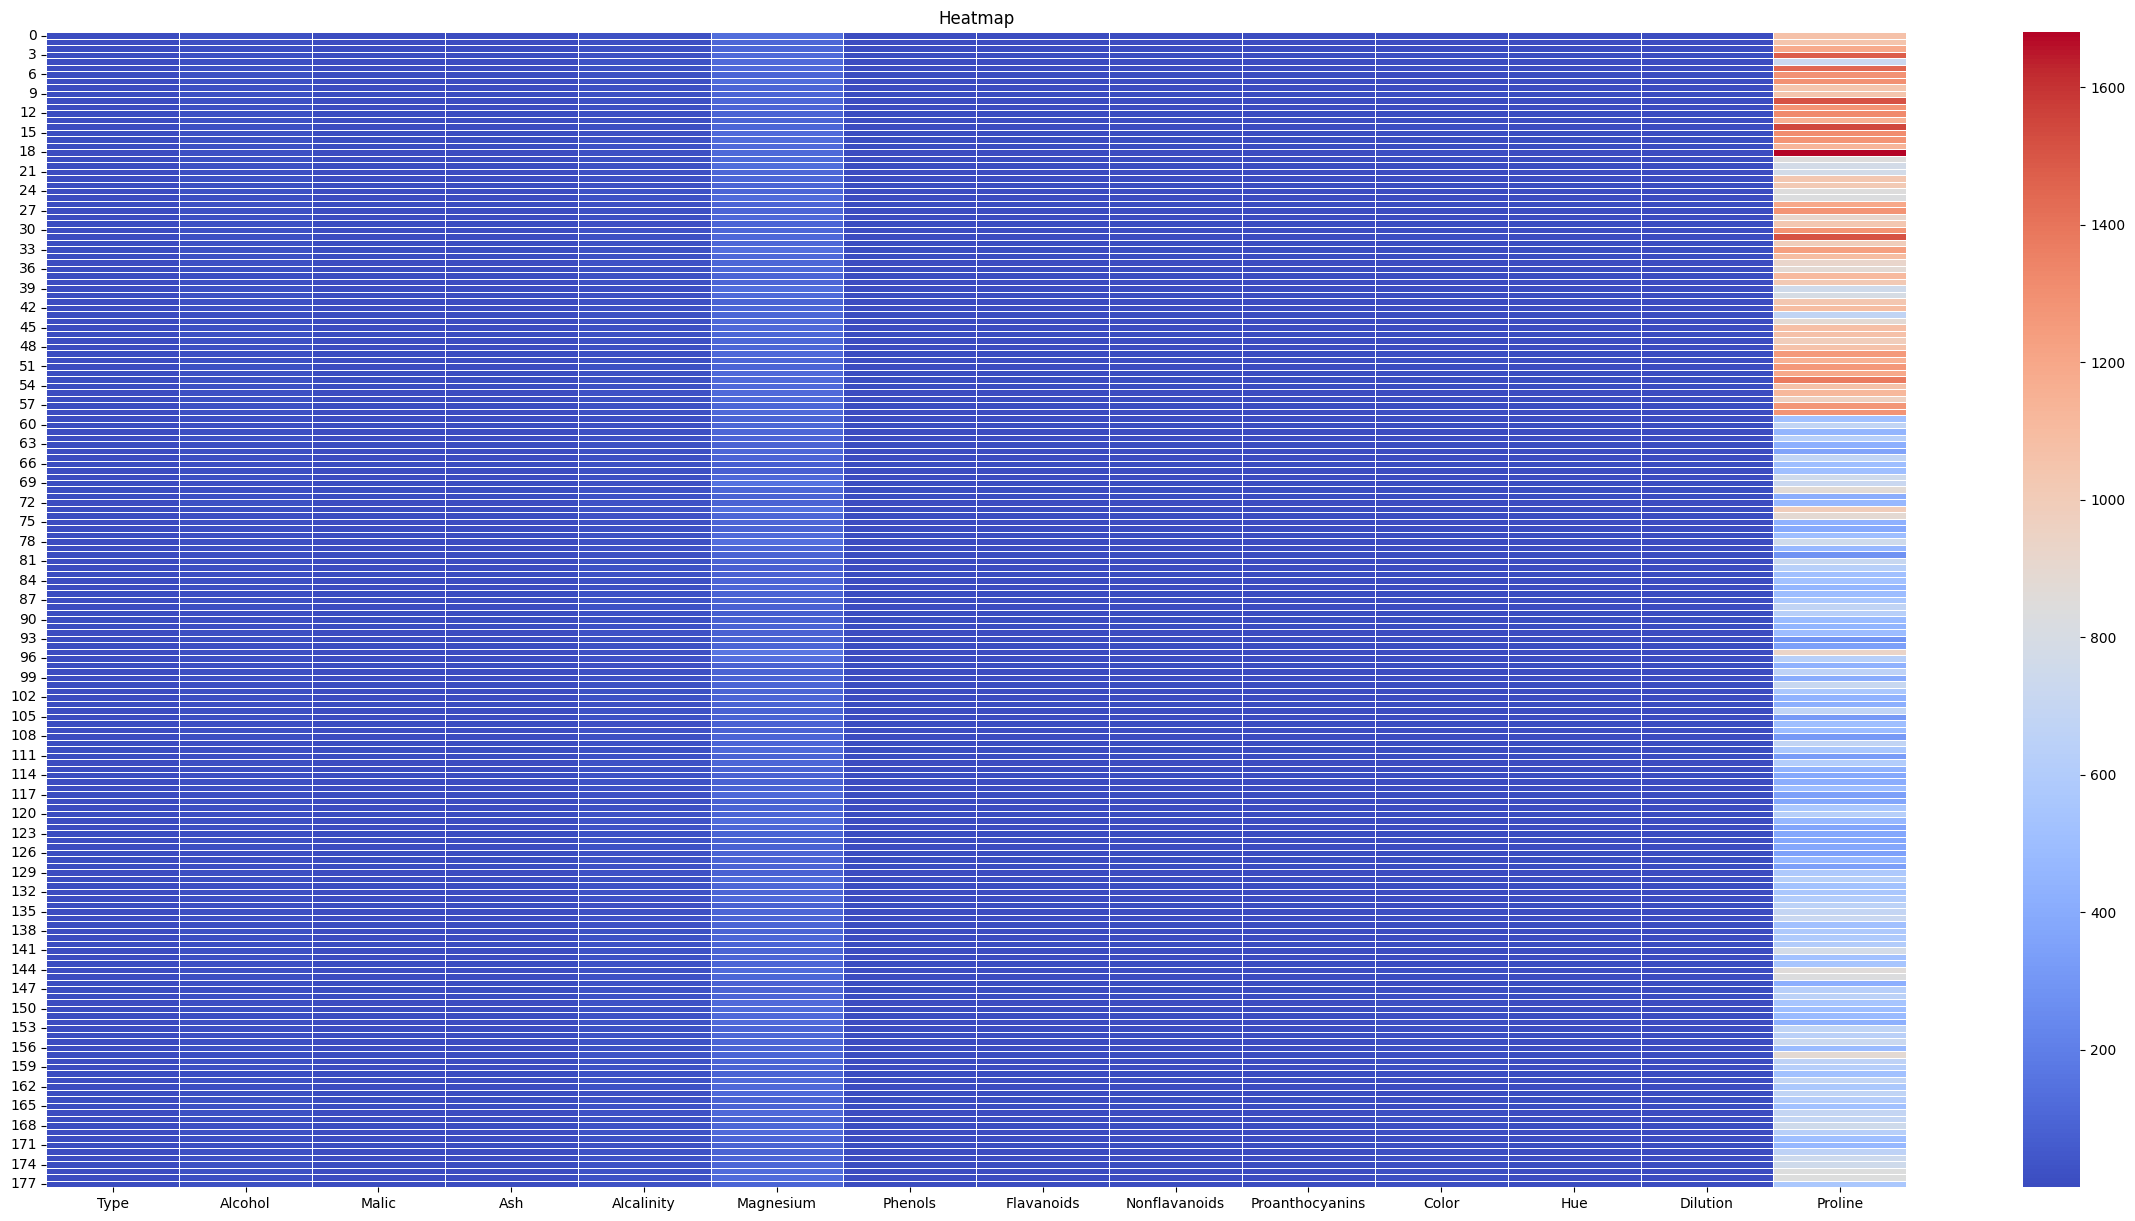

In [77]:
plt.figure(figsize=(30,15))
sns.heatmap(wine, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap')
plt.show()

- The majority of the features such as 'Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', and 'Dilution' show consistent blue colors, indicating lower variation and similar values across most of the samples. This suggests these features do not vary significantly among the samples.

- The most noticeable variation is in the 'Proline' column, which shows a significant range of values, with some samples having very high values (indicated by the red and orange colors) and others having much lower values (blue colors). This indicates that Proline levels vary widely among the samples in this dataset.

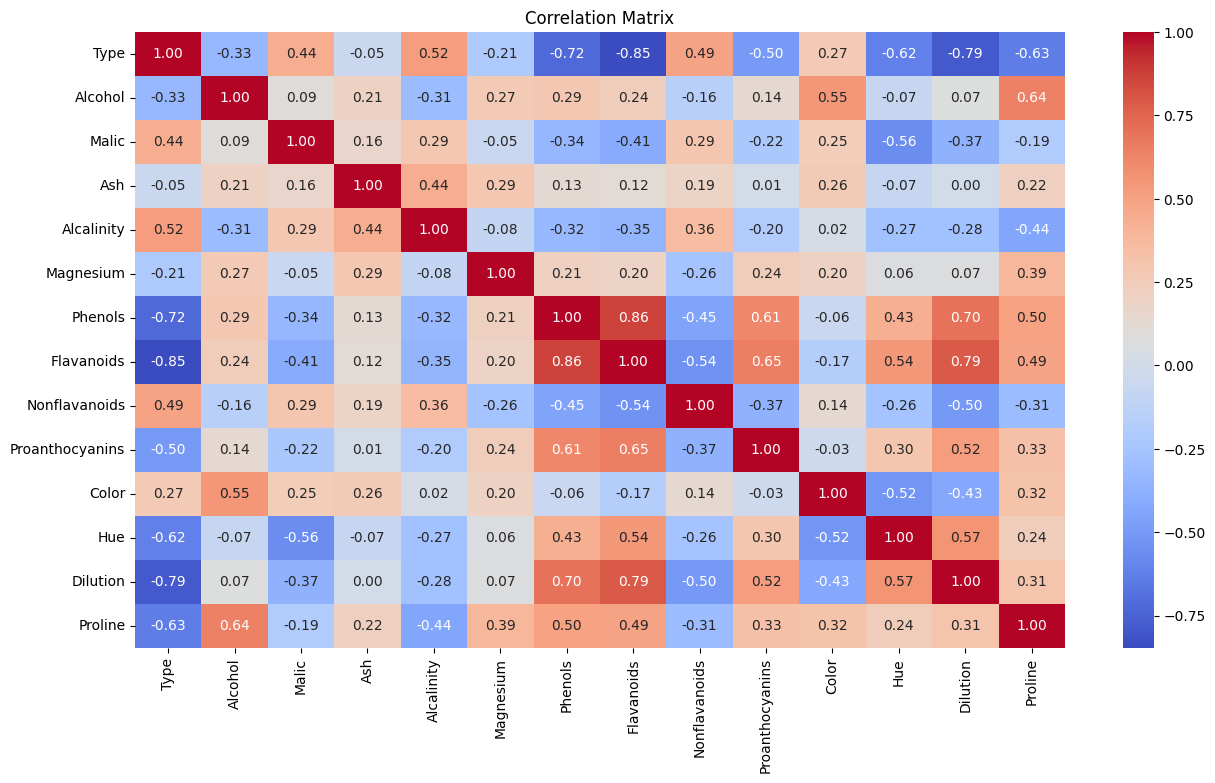

In [78]:
correlation_matrix = wine.corr()

# Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- Red indicates a strong positive correlation.
- Blue indicates a strong negative correlation.
- White indicates no correlation.
- The scale bar on the right helps to interpret the strength and direction of correlations.

- **Flavanoids and Phenols**: Strong positive correlation (0.86), indicating that as the content of flavanoids increases, the phenols content also increases.
- **Type and Flavanoids**: Strong negative correlation (-0.85), indicating that different types are inversely related to the flavanoids content.
- **Alcohol and Proline**: Strong positive correlation (0.64), suggesting higher alcohol content is associated with higher proline content.
- **Phenols and Dilution**: Strong positive correlation (0.70), indicating a direct relationship.

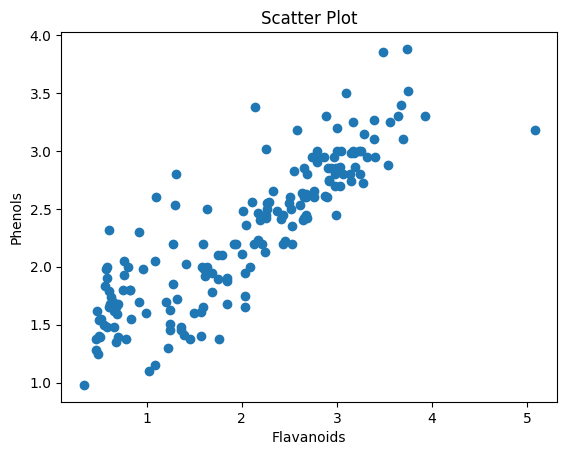

In [79]:
x=wine["Flavanoids"]
y= wine["Phenols"]
plt.scatter(x,y)
plt.xlabel('Flavanoids')
plt.ylabel('Phenols')
plt.title('Scatter Plot')
plt.show()

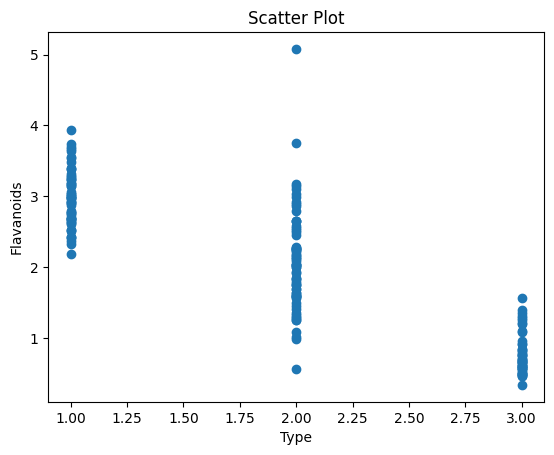

In [80]:
plt.scatter(wine["Type"],wine["Flavanoids"])
plt.xlabel('Type')
plt.ylabel('Flavanoids')
plt.title('Scatter Plot')
plt.show()

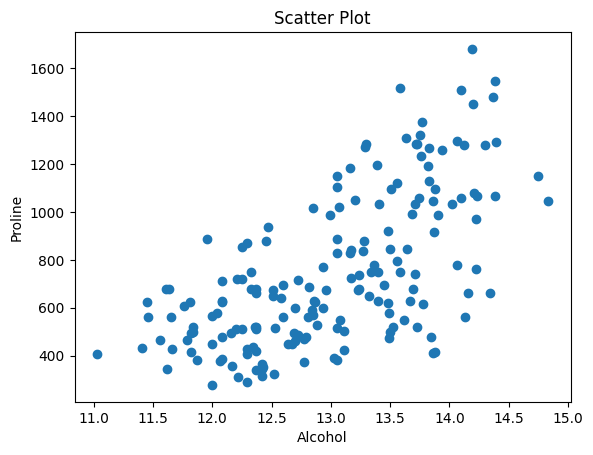

In [81]:
plt.scatter(wine["Alcohol"],wine["Proline"])
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.title('Scatter Plot')
plt.show()

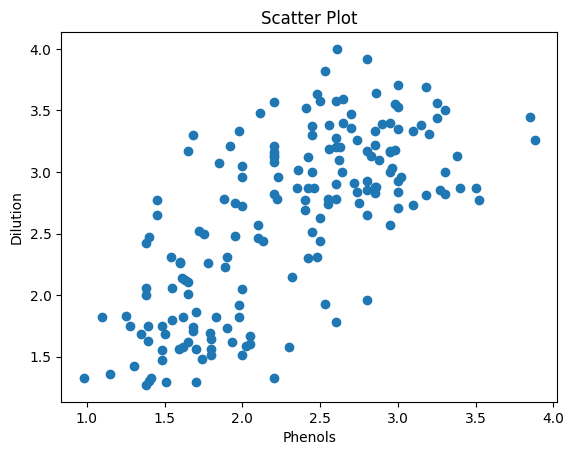

In [82]:
plt.scatter(wine["Phenols"],wine["Dilution"])
plt.xlabel('Phenols')
plt.ylabel('Dilution')
plt.title('Scatter Plot')
plt.show()

- These scatter plots between the highly correlated attributes gave a small detail that the data is scattered with a standard variance and no heteroskadsticity
- There are some other attributes that exhibit above moderate correlation between them such as "*Alocohol and proline*","*Type and Alcalinity*","*Phenols & Flavanoids with proanthocyanins*",and some less modearte ones

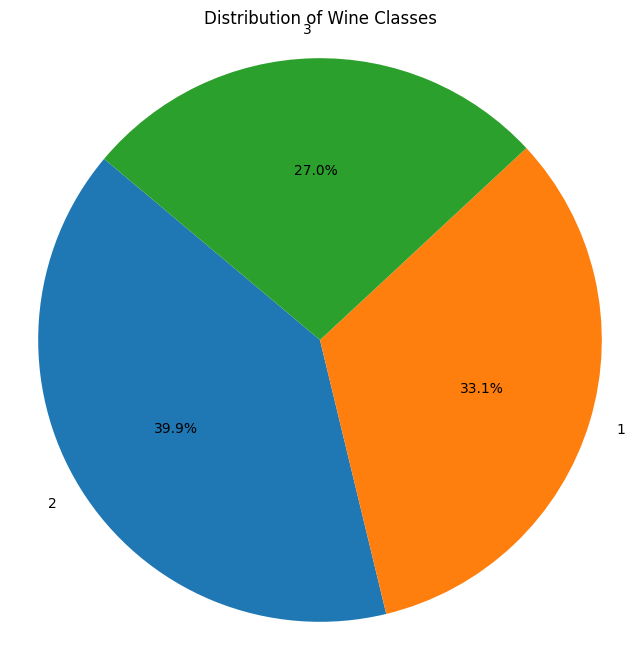

In [83]:

class_distribution = wine['Type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wine Classes')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

- 33.1 % of Type 1 wine is present in the data
- 39.9 % of Type 2 wine is present in the data
- 27.0 % of Type 3 wine is present in the data

- Visualization of pie chart for other attributes is not advisable as they are continous data and numerous data as of wine has only three types of data and its discrete such as 1,2,3

## Clustering

In [84]:
wine_data=wine.copy()
wine_data.head(2)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


- the original data wine stays put and we do all the scaling and all to the copyed data wine_data

In [85]:
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_data)

In [86]:
# Apply PCA
pca = PCA()
wine_pca = pca.fit_transform(wine_scaled)

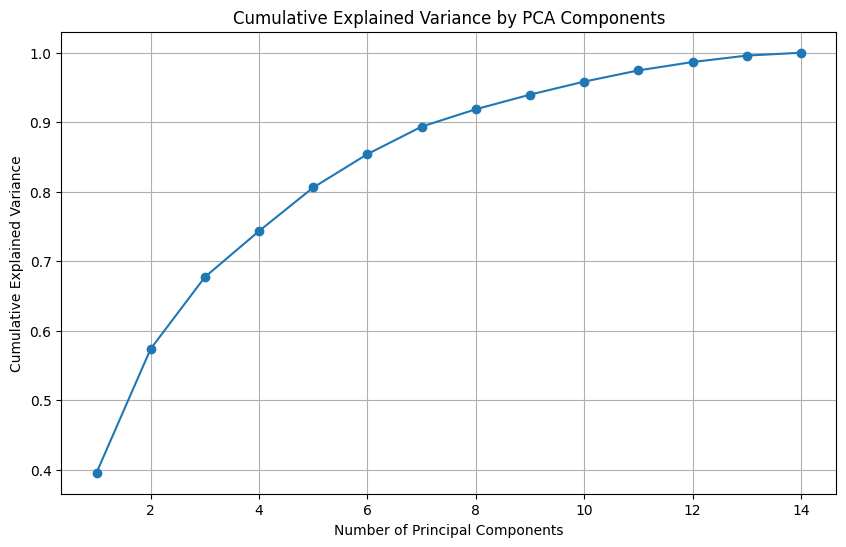

In [87]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

- X-axis: Represents the number of principal components.
- Y-axis: Represents the cumulative explained variance.

**Steps to Determine the Optimal Number of Principal Components**:

*Identify the 'Elbow' Point*:

- The "elbow" point on the scree plot indicates the point where adding more components provides diminishing returns in explaining the variance.
- It's the point where the curve starts to flatten.

*Threshold for Cumulative Explained Variance*:

- Another approach is to choose the number of components that explain a high percentage (e.g., 90-95%) of the variance.

**Optimal Principal Components**:

- Based on the elbow method, **4 or 5 components** seem optimal as they exaplain about **85% of variance**.
- Based on the cumulative explained variance method, **6 components** explain about **90% of the variance**, and **9 components** explain about **95% of the variance**.

### K Means Clustering

In [88]:
# taking te elbow point method into considertion
# Transform the dataset using the first 4 principal components
pca_elbow = PCA(n_components=4)
wine_pca_elbow = pca_elbow.fit_transform(wine_scaled)

In [89]:
#taking the cummaltive explained Variance into consideration
pca_3=PCA(n_components=6)
wine_pca_3=pca_3.fit_transform(wine_scaled)

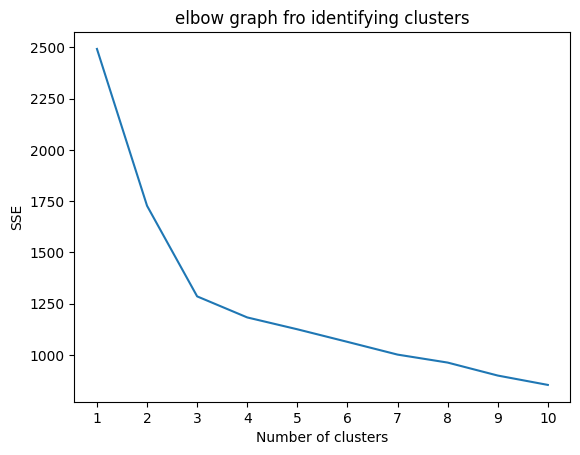

In [90]:
# Elbow Method
a = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=15)
    kmeans.fit(wine_scaled)
    a.append(kmeans.inertia_)

plt.plot(range(1, 11), a)
plt.xticks(range(1, 11))
plt.title("elbow graph fro identifying clusters")
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()
# by using this method we determine the number cluster to be formed

- the elbow method says three clusters

In [91]:
# K-means clustering on original data
kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(wine_scaled)

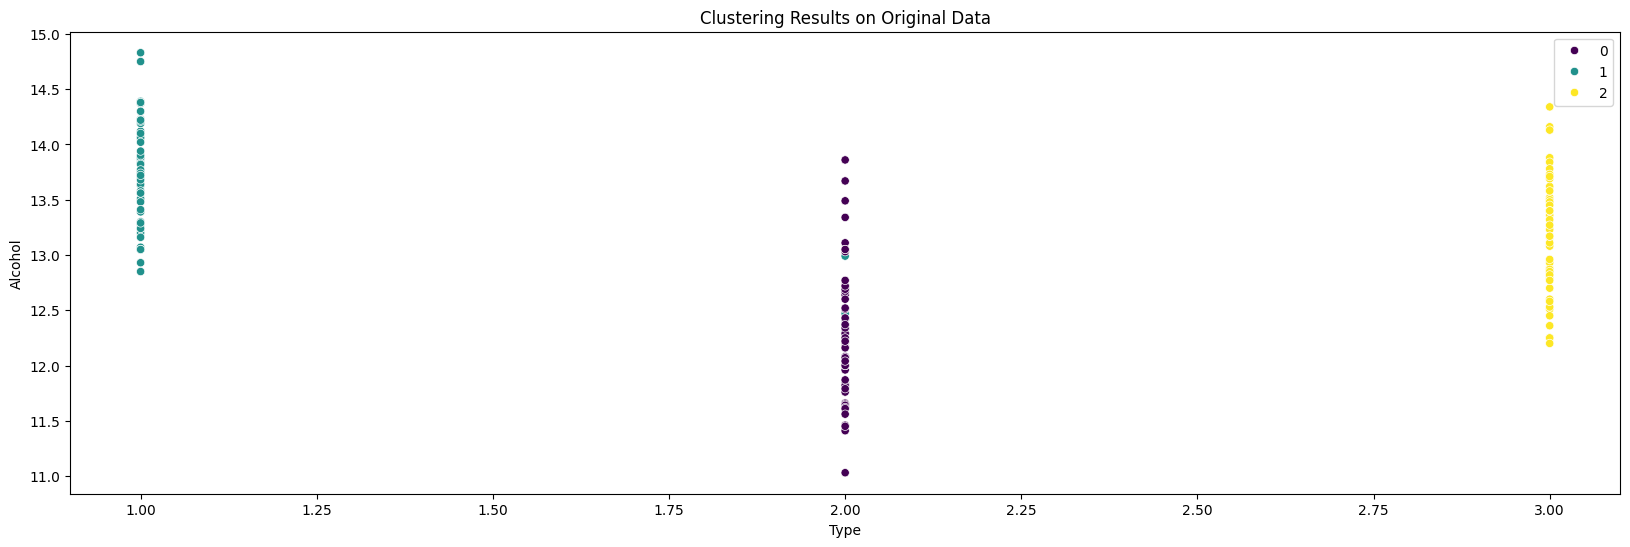

In [92]:
# Visualizing the clustering results
plt.figure(figsize=(20, 6))
sns.scatterplot(x=wine_data.iloc[:, 0], y=wine_data.iloc[:, 1], hue=clusters_original, palette='viridis')
plt.title('Clustering Results on Original Data')
plt.show()

In [93]:
# K-means clustering on PCA-transformed data  and considering components by elbow point method from skree plot
kmeans_pca_elbow = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca_elbow.fit_predict(wine_pca_elbow)

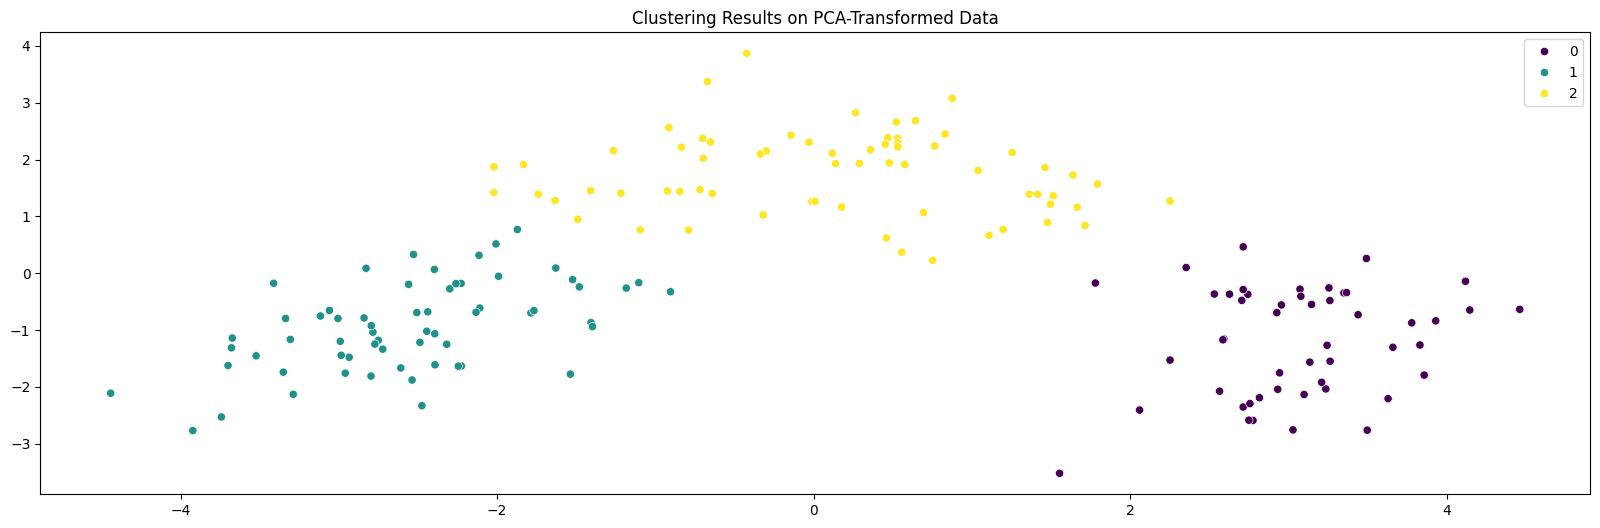

In [94]:
# Visualizing the clustering results
plt.figure(figsize=(20, 6))
sns.scatterplot(x=wine_pca_elbow[:, 0], y=wine_pca_elbow[:, 1], hue=clusters_pca, palette='viridis')
plt.title('Clustering Results on PCA-Transformed Data')
plt.show()

In [95]:
# K-means clustering on PCA-transformed data  and considering components by cummalative variance method from skree plot
kmeans_pca_cv = KMeans(n_clusters=3, random_state=42)
clusters_pca_cv = kmeans_pca_cv.fit_predict(wine_pca_3)

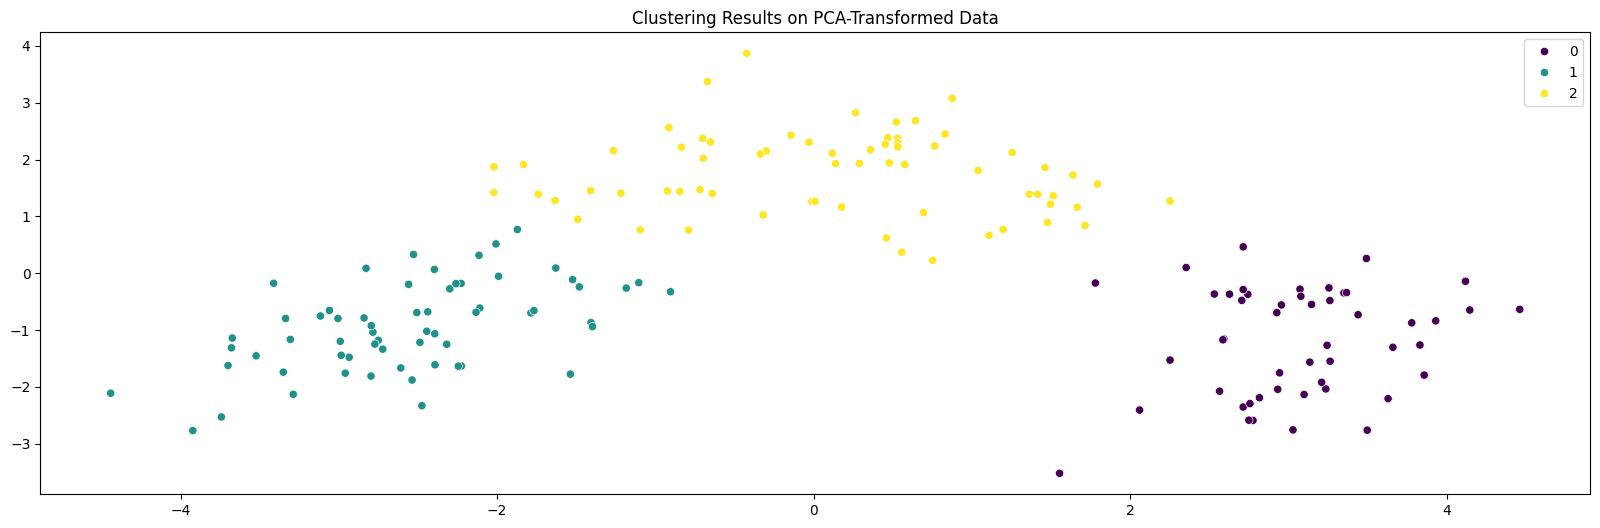

In [96]:
# Visualizing the clustering results
plt.figure(figsize=(20, 6))
sns.scatterplot(x=wine_pca_3[:, 0], y=wine_pca_3[:, 1], hue=clusters_pca_cv, palette='viridis')
plt.title('Clustering Results on PCA-Transformed Data')
plt.show()

- as far the ananlysis and clustering we can say that the clustering visualization  is same for both the principle components 4 and 6 lets change the priciple components to 9 so we could cover more variance and lets see if has any change in it

In [97]:
#taking the cummaltive explained Variance into consideration
pca_9=PCA(n_components=9)
wine_pca_9=pca_9.fit_transform(wine_scaled)

In [98]:
# K-means clustering on PCA-transformed data  and considering components by cummalative variance method from skree plot
kmeans_pca_9 = KMeans(n_clusters=3, random_state=42)
clusters_pca_9 = kmeans_pca_9.fit_predict(wine_pca_9)

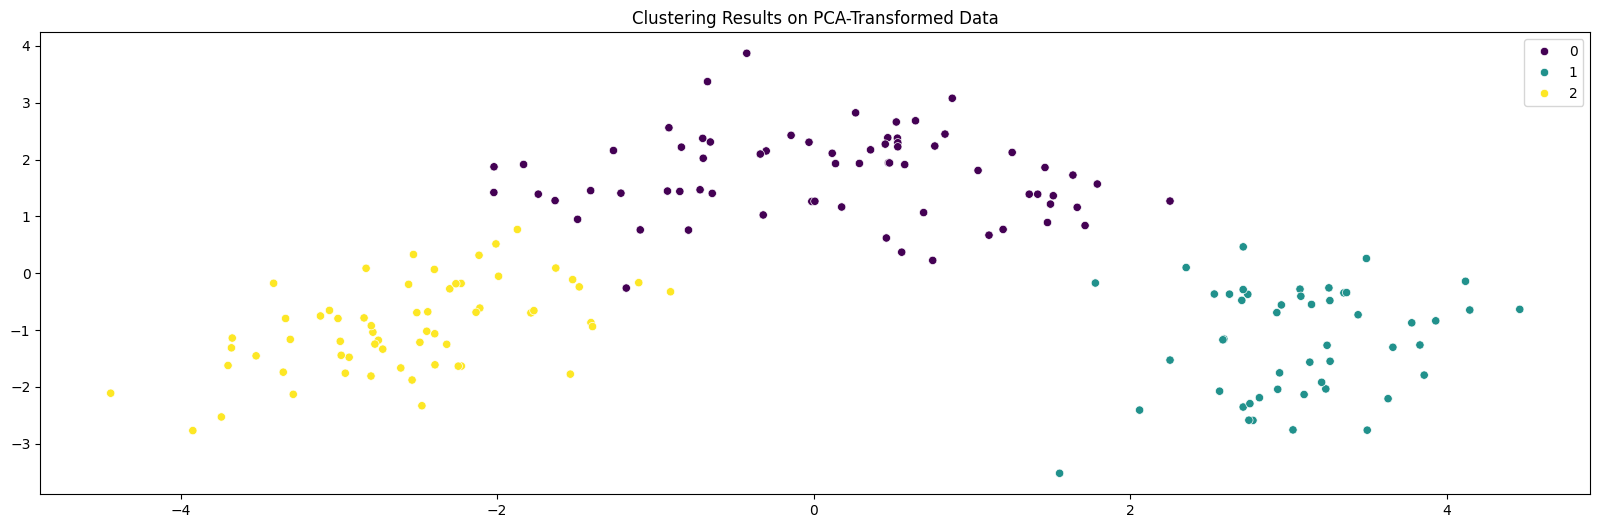

In [99]:
# Visualizing the clustering results
plt.figure(figsize=(20, 6))
sns.scatterplot(x=wine_pca_9[:, 0], y=wine_pca_9[:, 1], hue=clusters_pca_9, palette='viridis')
plt.title('Clustering Results on PCA-Transformed Data')
plt.show()

- by taking the principle components as 9 the changes we observed are
  - change in the colors of the clusters
  - one point is overlpped into another cluster

- Apart from these changes there is no other significant change with the increase of the PC's so we can consider the PC' to be either 5 or 6

In [100]:
# LET'S COMPARE THE SILUHOETTE SCORES TO DETERMINE WHICH CLUSTERS ARE GOOD
# Evaluating clustering performance
silhouette_original = silhouette_score(wine_scaled, clusters_original)
db_index_original = davies_bouldin_score(wine_scaled, clusters_original)
print(f'Silhouette Score (Original Data): {silhouette_original}')
print(f'Davies-Bouldin Index (Original Data): {db_index_original}')

Silhouette Score (Original Data): 0.30773604383565206
Davies-Bouldin Index (Original Data): 1.3163957434114109


In [101]:
# FOR THE PCA ELBOW CLUSTER
silhouette_elbow = silhouette_score(wine_pca_elbow, clusters_pca)
db_index_elbow = davies_bouldin_score(wine_pca_elbow, clusters_pca)
print(f'Silhouette Score ( For 4 principle components): {silhouette_elbow}')
print(f'Davies-Bouldin Index (for 4 principle components): {db_index_elbow}')

Silhouette Score ( For 4 principle components): 0.4367881227595954
Davies-Bouldin Index (for 4 principle components): 0.9186773896497286


In [102]:
silhouette_cv_6 = silhouette_score(wine_pca_3, clusters_pca_cv)
db_index_cv_6 = davies_bouldin_score(wine_pca_3, clusters_pca_cv)
print(f'Silhouette Score (For 6 principle components): {silhouette_cv_6}')
print(f'Davies-Bouldin Index (For 6 principle components): {db_index_cv_6}')

Silhouette Score (For 6 principle components): 0.37301511603150694
Davies-Bouldin Index (For 6 principle components): 1.0852406979651794


In [103]:
silhouette_cv_9 = silhouette_score(wine_pca_9, clusters_pca_9)
db_index_cv_9 = davies_bouldin_score(wine_pca_9, clusters_pca_9)
print(f'Silhouette Score (For 9 principle components): {silhouette_cv_9}')
print(f'Davies-Bouldin Index (For 9 Principle Components): {db_index_cv_9}')

Silhouette Score (For 9 principle components): 0.33216581377503124
Davies-Bouldin Index (For 9 Principle Components): 1.2262080781966276


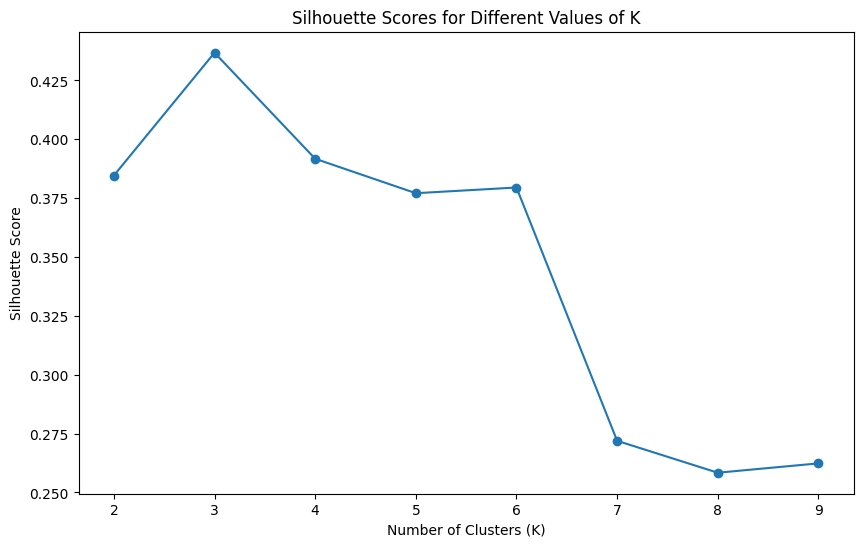

Best K: 3, Best Silhouette Score: 0.4367881227595954


In [104]:
# Apply PCA
#pca = PCA(n_components=2)
#wine_pca = pca.fit_transform(wine_scaled)
pca_elbow = PCA(n_components=4)
wine_pca_elbow = pca_elbow.fit_transform(wine_scaled)

# Try different values of K
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(wine_pca_elbow)
    score = silhouette_score(wine_pca_elbow, clusters)
    silhouette_scores.append(score)

# Plotting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Print the best K and its score
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
best_score = max(silhouette_scores)
print(f'Best K: {best_k}, Best Silhouette Score: {best_score}')

- So by using k means clustering the maximum clusters that are to be formed are 3 and the silhouette score is the maximum of 0.43 for the data with the principle components as 4
- if we go to less number of PC's than 4 it can increase the silhouette score but the cummalative variance decreases, that means we wont have enough information about the data to do furhtur steps

lets see if hierarchical clustering happens how it changes


### Hierarchical clustering

In [105]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

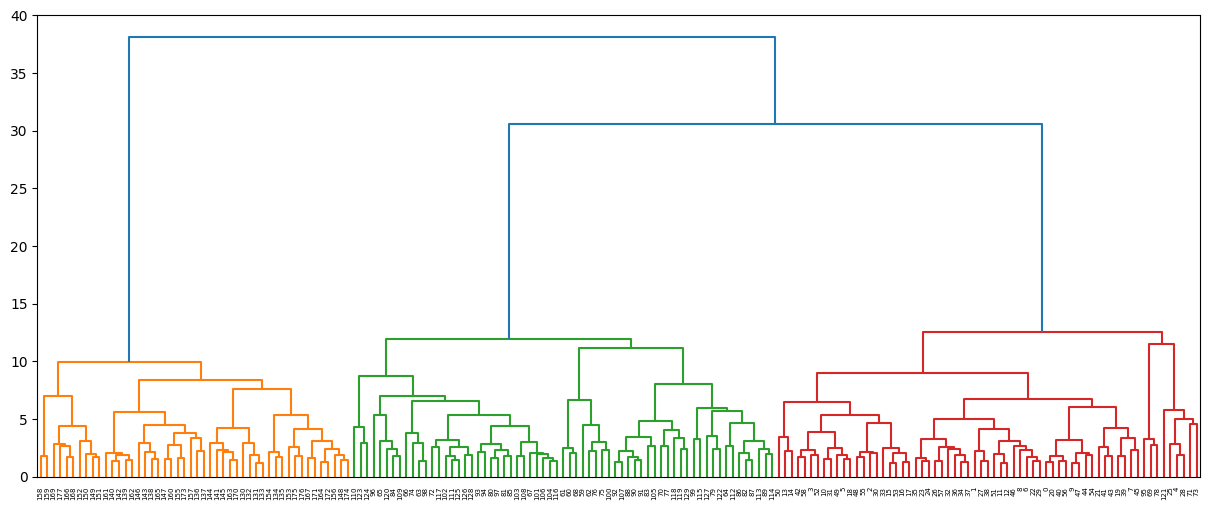

In [106]:
# Dendrogram for identifying the clusters
plt.figure(figsize=(15, 6))
linked = linkage(wine_scaled, method='ward')
dendrogram(linked)
plt.show()


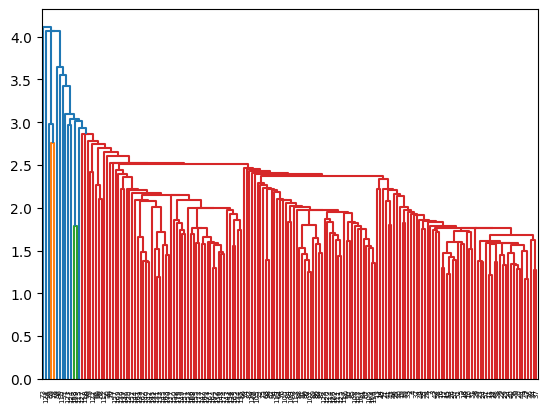

In [107]:
#using single method
linked1 = linkage(wine_scaled, method='single')
dendrogram(linked1)
plt.show()

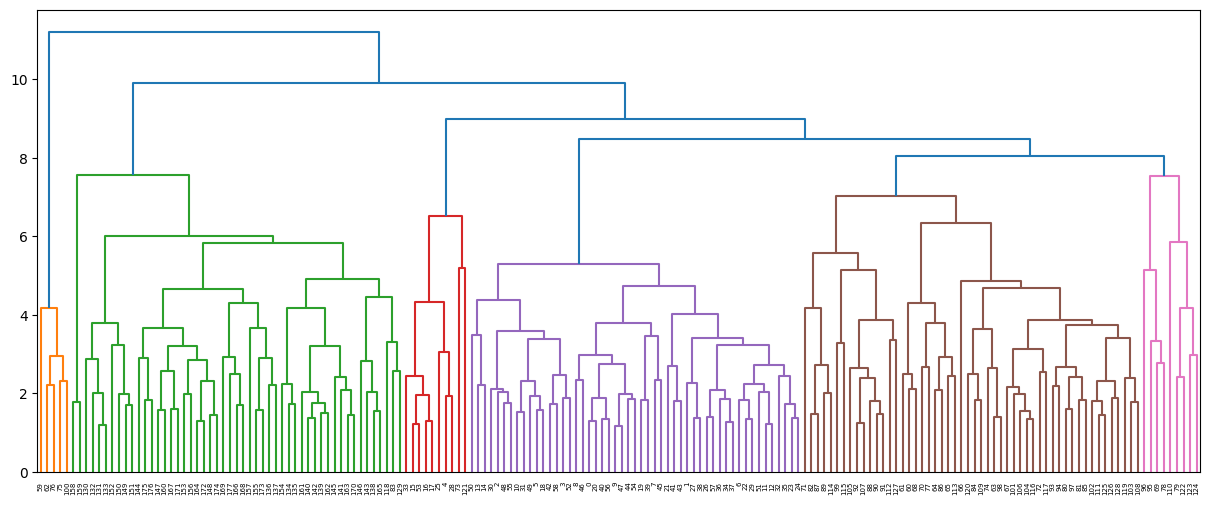

In [108]:
plt.figure(figsize=(15, 6))
linked2 = linkage(wine_scaled, method='complete')
dendrogram(linked2)
plt.show()

- so as we see, the linkage method ward is the one that gave us an equal split of clusters compared to both single and complete linkage methods
- so ward's method will be the linkage method we are using in the hierarchical clustering here

In [109]:
# hierarchical clustering for the original data
hierarchical_original = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_original=hierarchical_original.fit_predict(wine_scaled)

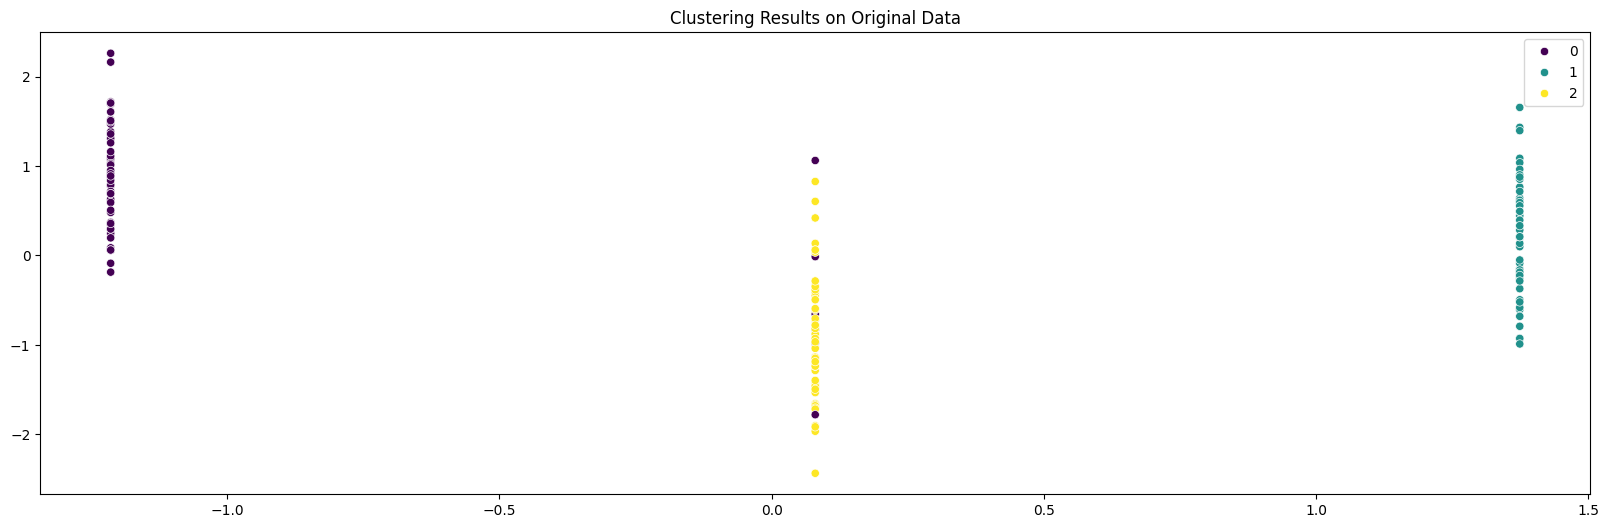

In [110]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=wine_scaled[:, 0], y=wine_scaled[:, 1], hue=hc_original, palette='viridis')
plt.title('Clustering Results on Original Data')
plt.show()

In [111]:
# HC for the pca elbow method that is with 4 components
# taking te elbow point method into considertion
# Transform the dataset using the first 4 principal components
#pca_elbow = PCA(n_components=4)
#wine_pca_elbow = pca_elbow.fit_transform(wine_scaled)
hierarchical_pca_4 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_pca_4=hierarchical_pca_4.fit_predict(wine_pca_elbow)

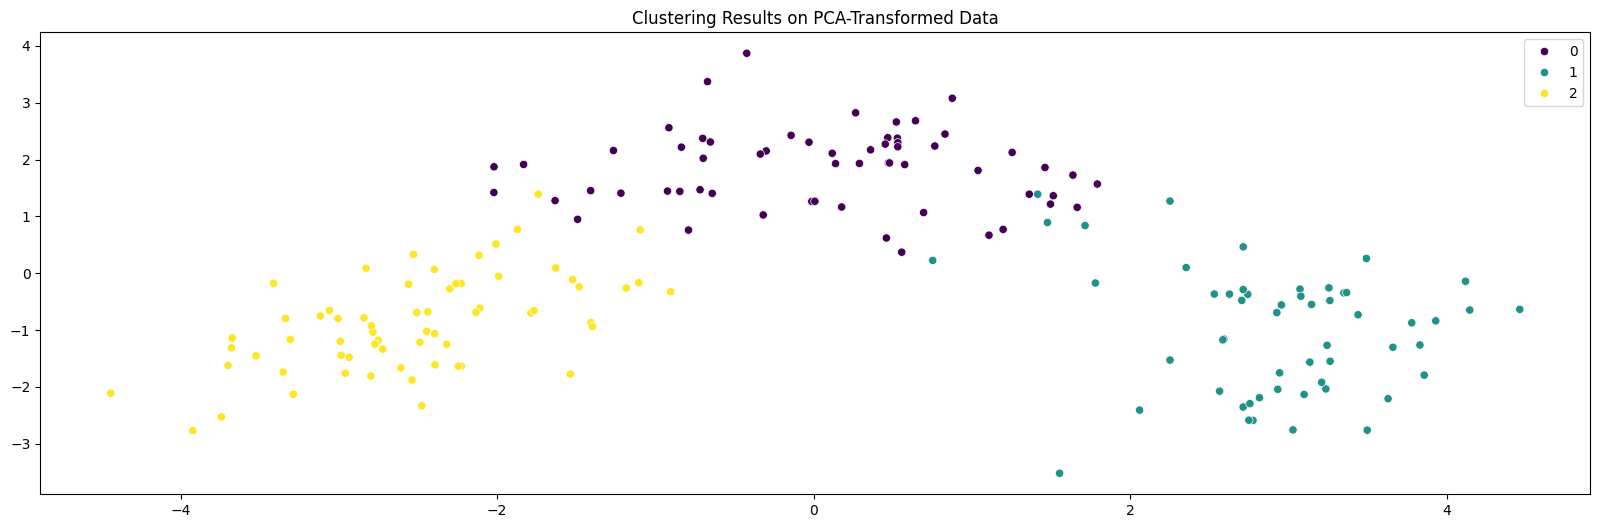

In [112]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=wine_pca_elbow[:, 0], y=wine_pca_elbow[:, 1], hue=hc_pca_4, palette='viridis')
plt.title('Clustering Results on PCA-Transformed Data')
plt.show()

In [113]:
#taking the cummaltive explained Variance into consideration
#pca_3=PCA(n_components=6)
#wine_pca_3=pca_3.fit_transform(wine_scaled)
hierarchical_pca_6 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_pca_6=hierarchical_pca_6.fit_predict(wine_pca_3)

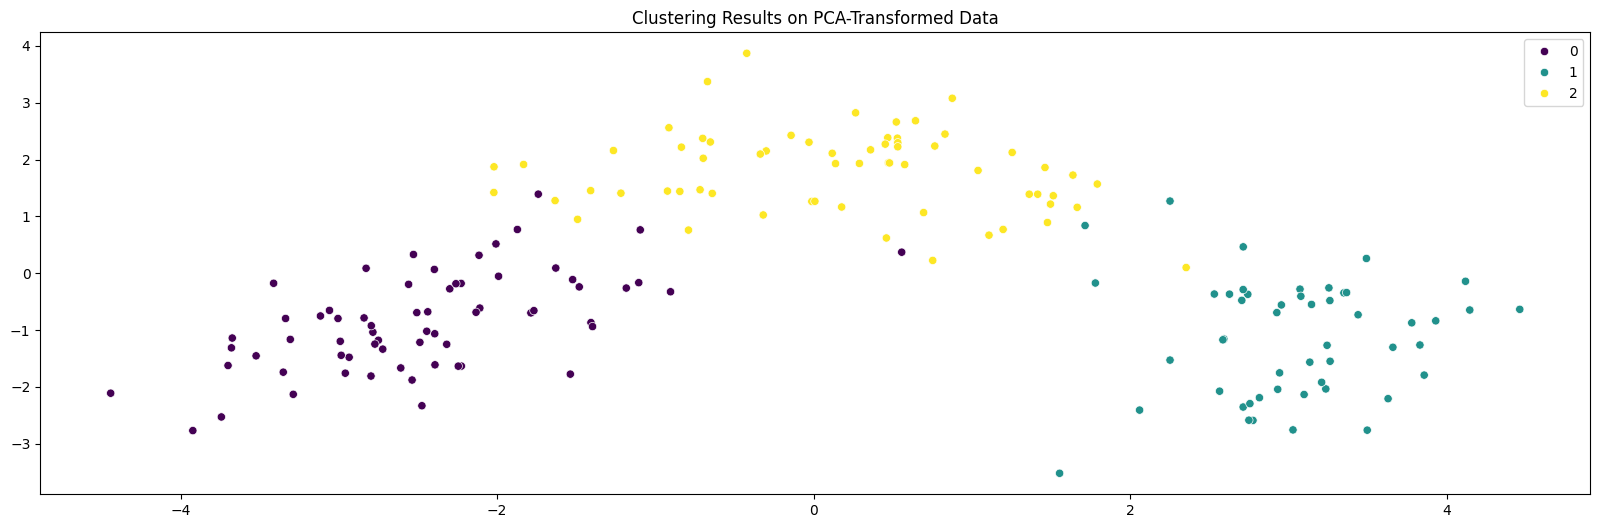

In [114]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=wine_pca_3[:, 0], y=wine_pca_3[:, 1], hue=hc_pca_6, palette='viridis')
plt.title('Clustering Results on PCA-Transformed Data')
plt.show()

- The visualization of the clusters while using hierarchical clustering is kind of dull than compared than to KMeans clustering  the clusters(as in the points at the borders are over-lapping)

- Know let's calculate the silhouette scores and Davies-Bouldin Index to determine which cluster has the best performance

In [115]:
#performance metrics for the hierarchical clustering
hc_silhouette_original = silhouette_score(wine_scaled, hc_original)
hc_db_index_original = davies_bouldin_score(wine_scaled, hc_original)
print(f'Silhouette Score (Original Data): {hc_silhouette_original}')
print(f'Davies-Bouldin Index (Original Data): {hc_db_index_original}')

Silhouette Score (Original Data): 0.3005913531964526
Davies-Bouldin Index (Original Data): 1.3263562067343448


In [116]:
# FOR THE PCA ELBOW CLUSTER
hc_silhouette_elbow = silhouette_score(wine_pca_elbow, hc_pca_4)
hc_db_index_elbow = davies_bouldin_score(wine_pca_elbow, hc_pca_4)
print(f'Silhouette Score ( For 4 principle components): {hc_silhouette_elbow}')
print(f'Davies-Bouldin Index (for 4 principle components): {hc_db_index_elbow}')

Silhouette Score ( For 4 principle components): 0.429674674915558
Davies-Bouldin Index (for 4 principle components): 0.923207350391554


In [117]:
# for the pca based on the cummulative variance method
hc_silhouette_cv = silhouette_score(wine_pca_elbow, hc_pca_6)
hc_db_index_cv = davies_bouldin_score(wine_pca_elbow, hc_pca_6)
print(f'Silhouette Score ( For 6 principle components): {hc_silhouette_cv}')
print(f'Davies-Bouldin Index (for 6 principle components): {hc_db_index_cv}')

Silhouette Score ( For 6 principle components): 0.4250826070065997
Davies-Bouldin Index (for 6 principle components): 0.9413359738665766


- And also the silhouette score are slight more better and significant in the Kmeans Clustering menthod

**FOR K-MEANS CLUSTERING**
- *For Original Data*
  - the silhouette score for original data is 0.307
  - the davies bouldin index is 1.316
- *For PCA Transformed data, by Elbow Method*
  - the silhouette score is 0.4367
  - the davies bouldin index is 0.91
- *For PCA Transformed data , by Cumulative Variance Method*
  - the silhouette score is 0.3730
  - the davies bouldin score is 1.08

for hierarchical clustering
- *For Original Data*
  - the silhouette score for original data is 0.3005
  - the davies bouldin index is 1.326
- *For PCA Transformed data, by Elbow Method*
  - the silhouette score is 0.4296
  - the davies bouldin index is 0.923
- *For PCA Transformed data , by Cumulative Variance Method*
  - the silhouette score is 0.4250
  - the davies bouldin score is 0.94


**the Impact of Dimensionality Reduction on Clustering Performance**
- Dimensionality reduction, such as PCA (Principal Component Analysis), has a significant impact on clustering performance. By reducing the dimensionality of the data, PCA helps in removing noise and redundant features, potentially making the clustering algorithm more effective.
- For K-Means clustering, the PCA-transformed data improves the silhouette score and reduces the Davies-Bouldin index, indicating better-defined clusters and more compact clusters with higher separation. The Elbow Method shows better performance compared to the Cumulative Variance Method.
- For hierarchical clustering, PCA transformation also improves the silhouette score and reduces the Davies-Bouldin index, similar to K-Means clustering. Both methods of PCA transformation (Elbow Method and Cumulative Variance Method) show improved performance over the original data.

**THE TRADE-OFFS BETWEEN USING PCA AND CLUSTERING DIRECTLY ON THE ORIGINAL DATASET**

*Advantages of Using PCA*:

- Noise Reduction: PCA helps in eliminating noise and irrelevant features, which can improve the performance of clustering algorithms.
- Better Visualization: Reducing data to fewer dimensions makes it easier to visualize and interpret clusters.
- Improved Cluster Quality: As seen from the improved silhouette scores and reduced Davies-Bouldin indices, PCA often leads to better-defined and more compact clusters.

*Disadvantages of Using PCA*:

- Loss of Information: PCA reduces the data dimensionality, which can sometimes lead to the loss of important information that may be critical for clustering.
- Computational Cost: The PCA transformation itself adds an additional computational step, which might be an overhead for very large datasets


*Clustering on Original Data*:

- Preservation of Information: Clustering on the original dataset ensures that no information is lost due to dimensionality reduction.
- Simplicity: It avoids the additional step of dimensionality reduction, making the process straightforward.